In [1]:
# Installation

# PyTorch
!pip install python-doctr[torch]

# From source : !pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=7cadf7f74badc5488322f2e46d79c0eb92ca5e55e9377b0ccfa34799ea97b8cf
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built mplcursors cairocffi
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 4,202 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-freefont-ttf all 20120503-7 [4,202 kB]
Fetched 4,202 kB in 1s (5,523 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading database ... 1

In [2]:
# Connecting to Gdrive to access documents
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# Provide your image path 
# IMG_DIR = "/content/drive/MyDrive/Colab Notebooks/images/"
%cd /content/drive/MyDrive/Colab Notebooks/images/

/content/drive/MyDrive/Colab Notebooks/images


In [6]:
!ls

handwritten4.jpg  income.jpg  noisy_ocr.png  ocr2.png  resume.webp  sample.pdf


In [10]:
# Necessary Imports
%matplotlib inline
import os

# Let's pick the desired backend
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor


## For PDF

In [12]:
# Read the file
doc = DocumentFile.from_pdf("sample.pdf")

# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

# Change model
# model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/101971449 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [15]:
result = predictor(doc)
result

Document(
  (pages): [
    Page(
      dimensions=(1584, 1224)
      (blocks): [
        Block(
          (lines): [
            Line(
              (words): [
                Word(value='A', confidence=1.0),
                Word(value='Simple', confidence=1.0),
                Word(value='PDF', confidence=1.0),
                Word(value='File', confidence=1.0),
              ]
            ),
            Line(
              (words): [
                Word(value='This', confidence=0.97),
                Word(value='is', confidence=1.0),
                Word(value='a', confidence=1.0),
                Word(value='small', confidence=1.0),
                Word(value='demonstration', confidence=0.96),
                Word(value='-pdf', confidence=0.51),
                Word(value='file', confidence=1.0),
                Word(value='-', confidence=0.99),
              ]
            ),
          ]
          (artefacts): []
        ),
        Block(
          (lines): [
            Line(
    

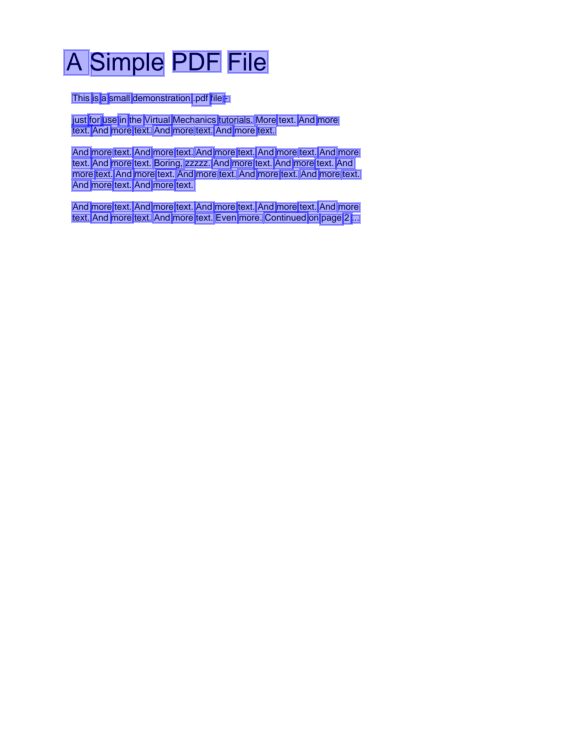

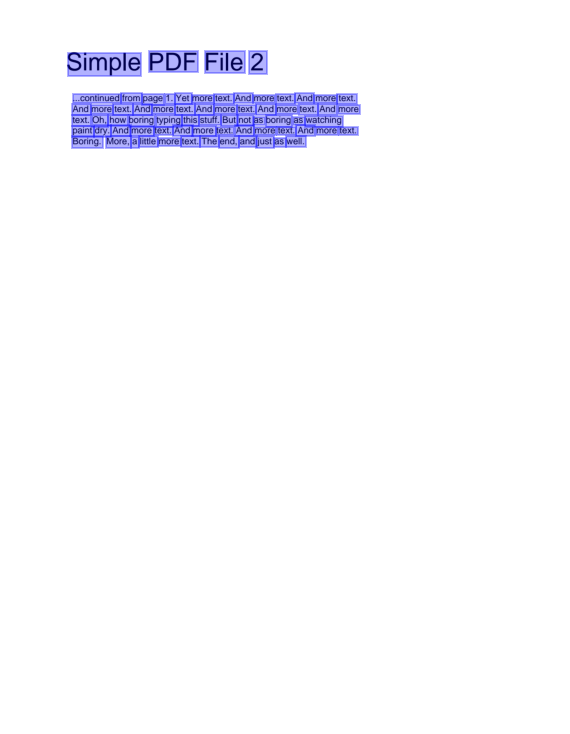

In [14]:
result.show(doc)

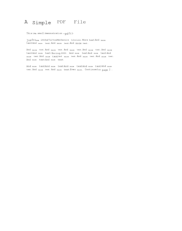

In [16]:
# checking if extracted information is correctly structured
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [56]:
# XML export
xml_output = result.export_as_xml()
print(xml_output[0][0])

b'<html xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><title>docTR - XML export (hOCR)</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type" /><meta content="python-doctr 0.5.1" name="ocr-system" /><meta content="ocr_page ocr_carea ocr_par ocr_line ocrx_word" name="ocr-capabilities" /></head><body><div class="ocr_page" id="page_1" title="image; bbox 0 0 1224 1584; ppageno 0" /><div class="ocr_carea" id="block_1" title="bbox 126 94                     573 218"><p class="ocr_par" id="par_1" title="bbox 126 94                     573 218"><span class="ocr_line" id="line_1" title="bbox 126 94                         573 152;                         baseline 0 0; x_size 0; x_descenders 0; x_ascenders 0"><span class="ocrx_word" id="word_1" title="bbox 126 94                             179 148;                             x_wconf 100">A</span><span class="ocrx_word" id="word_2" title="bbox 183 101                             344 152;                            

In [18]:
# JSON export
ocr_results = result.export()
print(ocr_results)

{'pages': [{'page_idx': 0, 'dimensions': (1584, 1224), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.1025390625, 0.0595703125), (0.4677734375, 0.1376953125)), 'lines': [{'geometry': ((0.1025390625, 0.0595703125), (0.4677734375, 0.095703125)), 'words': [{'value': 'A', 'confidence': 0.999777615070343, 'geometry': ((0.1025390625, 0.0595703125), (0.146484375, 0.09375))}, {'value': 'Simple', 'confidence': 0.9981071949005127, 'geometry': ((0.1494140625, 0.0634765625), (0.28125, 0.095703125))}, {'value': 'PDF', 'confidence': 0.9999655485153198, 'geometry': ((0.296875, 0.0615234375), (0.384765625, 0.0908203125))}, {'value': 'File', 'confidence': 0.9999971389770508, 'geometry': ((0.396484375, 0.0615234375), (0.4677734375, 0.091796875))}]}, {'geometry': ((0.115234375, 0.119140625), (0.3994140625, 0.1376953125)), 'words': [{'value': 'This', 'confidence': 0.9705145955085754, 'geometry': ((0.115234375, 0.119140625), 

In [45]:
first_sentence = ocr_results['pages'][0]['blocks'][0]['lines'][0]['words']
first_sentence

[{'confidence': 0.999777615070343,
  'geometry': ((0.1025390625, 0.0595703125), (0.146484375, 0.09375)),
  'value': 'A'},
 {'confidence': 0.9981071949005127,
  'geometry': ((0.1494140625, 0.0634765625), (0.28125, 0.095703125)),
  'value': 'Simple'},
 {'confidence': 0.9999655485153198,
  'geometry': ((0.296875, 0.0615234375), (0.384765625, 0.0908203125)),
  'value': 'PDF'},
 {'confidence': 0.9999971389770508,
  'geometry': ((0.396484375, 0.0615234375), (0.4677734375, 0.091796875)),
  'value': 'File'}]

In [46]:
# Let's extract the title from the pdf 
sent = []

for idx in range(len(first_sentence)):
  extracted_sentence = first_sentence[idx]['value']
  sent.append([extracted_sentence])

In [53]:
range(len(sent))

range(0, 4)

In [54]:
cleaned_sent = []

for idx in range(len(sent)):
  sentence = sent[idx][0]
  cleaned_sent.append(sentence)

In [55]:
cleaned_sent

['A', 'Simple', 'PDF', 'File']

## For Images

In [68]:
# Image
image = DocumentFile.from_images("income.jpg")
result = predictor(image)

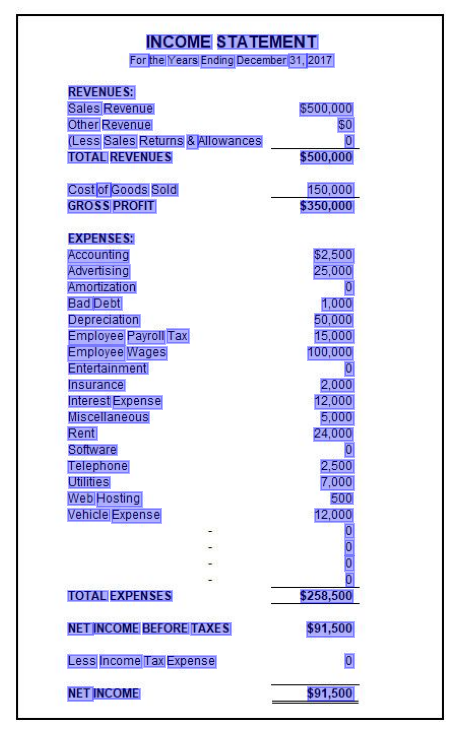

In [70]:
result.show(image)

In [74]:
# Multiple page images
multi_images = DocumentFile.from_images(["handwritten4.jpg", "resume.webp"])
result = predictor(multi_images)

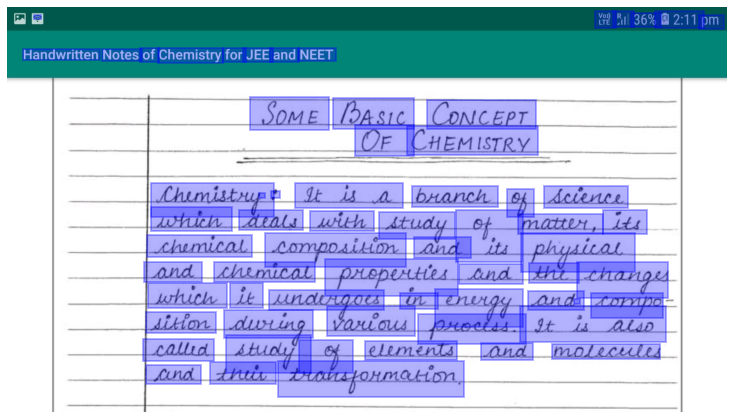

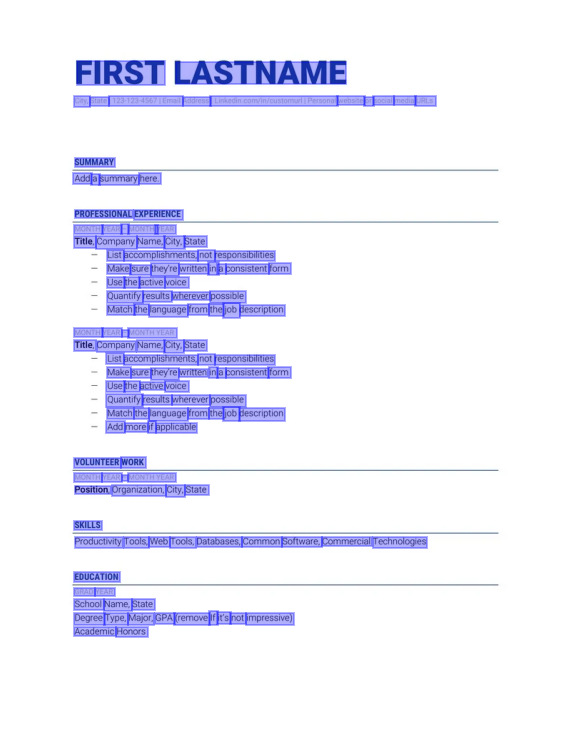

In [75]:
result.show(multi_images)